#### Data Preparation for Power BI Dashboard


In [76]:
#import necessary libraries 
import pandas as pd 
import numpy as np
import pyodbc 
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from dotenv import load_dotenv,dotenv_values
from sqlalchemy import create_engine, inspect


In [79]:
#Load the environment variables from the .env file 
environment_variables=dotenv_values('.env')

#get the database credentials from the .env file 
database=environment_variables.get('database')
server=environment_variables.get("server_name")
username=environment_variables.get("user")
password=environment_variables.get("password")

#construct the connection string 
connection_string = f"DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PASSWORD={password};"

#create a connection to the database

conn = pyodbc.connect(connection_string)

OperationalError: ('08001', '[08001] [Microsoft][ODBC Driver 18 for SQL Server]Named Pipes Provider: Could not open a connection to SQL Server [53].  (53) (SQLDriverConnect); [08001] [Microsoft][ODBC Driver 18 for SQL Server]Login timeout expired (0); [08001] [Microsoft][ODBC Driver 18 for SQL Server]Invalid connection string attribute (0); [08001] [Microsoft][ODBC Driver 18 for SQL Server]A network-related or instance-specific error has occurred while establishing a connection to None. Server is not found or not accessible. Check if instance name is correct and if SQL Server is configured to allow remote connections. For more information see SQL Server Books Online. (53)')

In [27]:
conn_str = (
    'DRIVER={SQL Server};'
    'SERVER=dap-projects-database.database.windows.net;'
    'DATABASE=dapDB;'
    'UID=capstone;'
    'PWD=Z7x@8pM$2w'
)
conn = pyodbc.connect(conn_str)

In [29]:
#identify the tables in the database 


# Query to list all tables in the database
query = """SELECT TABLE_SCHEMA, TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE = 'BASE TABLE'"""


tables = pd.read_sql(query, conn)

tables

C:\Users\user\AppData\Local\Temp\ipykernel_5704\2365333980.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables = pd.read_sql(query, conn)


,TABLE_SCHEMA,TABLE_NAME
0,dbo,Sales_July_2019
1,dbo,Sales_August_2019
2,dbo,Sales_September_2019
3,dbo,Sales_October_2019
4,dbo,Sales_November_2019
5,dbo,Sales_December_2019


In [30]:
#query to get information from tables
query="""SELECT * FROM Sales_July_2019"""

July = pd.read_sql(query, conn)
July 


C:\Users\user\AppData\Local\Temp\ipykernel_5704\190763943.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  July = pd.read_sql(query, conn)


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.000000,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.000000,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.840000,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.840000,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.990000,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"
...,...,...,...,...,...,...
14366,236665.0,Wired Headphones,1.0,11.990000,2020-07-19 16:16:00.0000000,"694 Meadow St, Atlanta, GA 30301"
14367,236666.0,20in Monitor,1.0,109.989998,2031-07-19 20:11:00.0000000,"866 14th St, San Francisco, CA 94016"
14368,236667.0,AAA Batteries (4-pack),1.0,2.990000,2017-07-19 22:29:00.0000000,"249 Cherry St, Dallas, TX 75001"
14369,236668.0,Wired Headphones,1.0,11.990000,2030-07-19 19:28:00.0000000,"727 Wilson St, Austin, TX 73301"


In [31]:
#query to get information from tables
query="""SELECT * FROM Sales_August_2019"""

August = pd.read_sql(query, conn)
August 


C:\Users\user\AppData\Local\Temp\ipykernel_5704\970674740.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  August = pd.read_sql(query, conn)


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.0,Wired Headphones,2.0,11.990000,2031-08-19 22:21:00.0000000,"359 Spruce St, Seattle, WA 98101"
1,236671.0,Bose SoundSport Headphones,1.0,99.989998,2015-08-19 15:11:00.0000000,"492 Ridge St, Dallas, TX 75001"
2,236672.0,iPhone,1.0,700.000000,2006-08-19 14:40:00.0000000,"149 7th St, Portland, OR 97035"
3,236673.0,AA Batteries (4-pack),2.0,3.840000,2029-08-19 20:59:00.0000000,"631 2nd St, Los Angeles, CA 90001"
4,236674.0,AA Batteries (4-pack),2.0,3.840000,2015-08-19 19:53:00.0000000,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
12006,248146.0,Bose SoundSport Headphones,1.0,99.989998,2029-08-19 22:19:00.0000000,"868 Hickory St, San Francisco, CA 94016"
12007,248147.0,AAA Batteries (4-pack),3.0,2.990000,2031-08-19 16:26:00.0000000,"206 Lakeview St, Boston, MA 02215"
12008,248148.0,AA Batteries (4-pack),1.0,3.840000,2002-08-19 07:25:00.0000000,"568 13th St, Seattle, WA 98101"
12009,248149.0,USB-C Charging Cable,1.0,11.950000,2008-08-19 12:10:00.0000000,"495 Walnut St, San Francisco, CA 94016"


In [32]:
#query to get information from tables
query="""SELECT * FROM Sales_September_2019"""

September = pd.read_sql(query, conn)
September

C:\Users\user\AppData\Local\Temp\ipykernel_5704\3178251185.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  September = pd.read_sql(query, conn)


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,248151.0,AA Batteries (4-pack),4.0,3.840000,2017-09-19 14:44:00.0000000,"380 North St, Los Angeles, CA 90001"
1,248152.0,USB-C Charging Cable,2.0,11.950000,2029-09-19 10:19:00.0000000,"511 8th St, Austin, TX 73301"
2,248153.0,USB-C Charging Cable,1.0,11.950000,2016-09-19 17:48:00.0000000,"151 Johnson St, Los Angeles, CA 90001"
3,248154.0,27in FHD Monitor,1.0,149.990005,2027-09-19 07:52:00.0000000,"355 Hickory St, Seattle, WA 98101"
4,248155.0,USB-C Charging Cable,1.0,11.950000,2001-09-19 19:03:00.0000000,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
11681,259353.0,AAA Batteries (4-pack),3.0,2.990000,2017-09-19 20:56:00.0000000,"840 Highland St, Los Angeles, CA 90001"
11682,259354.0,iPhone,1.0,700.000000,2001-09-19 16:00:00.0000000,"216 Dogwood St, San Francisco, CA 94016"
11683,259355.0,iPhone,1.0,700.000000,2023-09-19 07:39:00.0000000,"220 12th St, San Francisco, CA 94016"
11684,259356.0,34in Ultrawide Monitor,1.0,379.989990,2019-09-19 17:30:00.0000000,"511 Forest St, San Francisco, CA 94016"


In [33]:
#query to get information from tables
query="""SELECT * FROM Sales_October_2019"""

October = pd.read_sql(query, conn)
October 

C:\Users\user\AppData\Local\Temp\ipykernel_5704\1632939282.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  October = pd.read_sql(query, conn)


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,259358.0,34in Ultrawide Monitor,1.0,379.989990,2028-10-19 10:56:00.0000000,"609 Cherry St, Dallas, TX 75001"
1,259359.0,27in 4K Gaming Monitor,1.0,389.989990,2028-10-19 17:26:00.0000000,"225 5th St, Los Angeles, CA 90001"
2,259360.0,AAA Batteries (4-pack),2.0,2.990000,2024-10-19 17:20:00.0000000,"967 12th St, New York City, NY 10001"
3,259361.0,27in FHD Monitor,1.0,149.990005,2014-10-19 22:26:00.0000000,"628 Jefferson St, New York City, NY 10001"
4,259362.0,Wired Headphones,1.0,11.990000,2007-10-19 16:10:00.0000000,"534 14th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
20374,278792.0,AA Batteries (4-pack),1.0,3.840000,2012-10-19 04:32:00.0000000,"920 Adams St, San Francisco, CA 94016"
20375,278793.0,Wired Headphones,1.0,11.990000,2028-10-19 22:00:00.0000000,"161 Chestnut St, Los Angeles, CA 90001"
20376,278794.0,AA Batteries (4-pack),1.0,3.840000,2009-10-19 20:58:00.0000000,"346 Spruce St, San Francisco, CA 94016"
20377,278795.0,iPhone,1.0,700.000000,2031-10-19 17:21:00.0000000,"291 Hill St, Seattle, WA 98101"


In [34]:
#query to get information from tables
query="""SELECT * FROM Sales_November_2019"""
November = pd.read_sql(query, conn)
November  

C:\Users\user\AppData\Local\Temp\ipykernel_5704\2165037311.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  November = pd.read_sql(query, conn)


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,278797.0,Wired Headphones,1.0,11.990000,2021-11-19 09:54:00.0000000,"46 Park St, New York City, NY 10001"
1,278798.0,USB-C Charging Cable,2.0,11.950000,2017-11-19 10:03:00.0000000,"962 Hickory St, Austin, TX 73301"
2,278799.0,Apple Airpods Headphones,1.0,150.000000,2019-11-19 14:56:00.0000000,"464 Cherry St, Los Angeles, CA 90001"
3,278800.0,27in FHD Monitor,1.0,149.990005,2025-11-19 22:24:00.0000000,"649 10th St, Seattle, WA 98101"
4,278801.0,Bose SoundSport Headphones,1.0,99.989998,2009-11-19 13:56:00.0000000,"522 Hill St, Boston, MA 02215"
...,...,...,...,...,...,...
17656,295660.0,AAA Batteries (4-pack),2.0,2.990000,2004-11-19 14:17:00.0000000,"574 4th St, Los Angeles, CA 90001"
17657,295661.0,USB-C Charging Cable,1.0,11.950000,2023-11-19 07:22:00.0000000,"359 1st St, Austin, TX 73301"
17658,295662.0,Lightning Charging Cable,1.0,14.950000,2013-11-19 16:12:00.0000000,"900 10th St, Boston, MA 02215"
17659,295663.0,AAA Batteries (4-pack),1.0,2.990000,2017-11-19 17:08:00.0000000,"592 Sunset St, Boston, MA 02215"


In [35]:
#query to get information from tables
query="""SELECT * FROM Sales_December_2019"""

December = pd.read_sql(query, conn)
December

C:\Users\user\AppData\Local\Temp\ipykernel_5704\1113675732.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  December = pd.read_sql(query, conn)


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,295665.0,Macbook Pro Laptop,1.0,1700.000000,2030-12-19 00:01:00.0000000,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,600.000000,2029-12-19 07:03:00.0000000,"562 2nd St, New York City, NY 10001"
2,295667.0,USB-C Charging Cable,1.0,11.950000,2012-12-19 18:21:00.0000000,"277 Main St, New York City, NY 10001"
3,295668.0,27in FHD Monitor,1.0,149.990005,2022-12-19 15:13:00.0000000,"410 6th St, San Francisco, CA 94016"
4,295669.0,USB-C Charging Cable,1.0,11.950000,2018-12-19 12:38:00.0000000,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.950000,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
25113,319667.0,AA Batteries (4-pack),2.0,3.840000,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
25114,319668.0,Vareebadd Phone,1.0,400.000000,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
25115,319669.0,Wired Headphones,1.0,11.990000,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"


Load datasets from csv. 

In [36]:
January=pd.read_csv("Sales_January_2019.csv")
January

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


In [37]:
February=pd.read_csv("Sales_February_2019.csv")
February

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"
...,...,...,...,...,...,...
12031,162004,Apple Airpods Headphones,1,150,02/12/19 22:02,"227 Church St, San Francisco, CA 94016"
12032,162005,AAA Batteries (4-pack),2,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001"
12033,162006,USB-C Charging Cable,1,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301"
12034,162007,USB-C Charging Cable,1,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001"


In [38]:
March=pd.read_csv("Sales_March_2019.csv")
March

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016"
15222,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016"
15223,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001"
15224,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016"


In [39]:
April=pd.read_csv("Sales_April_2019.csv")
April

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [40]:
May=pd.read_csv("Sales_May_2019.csv")
May

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"
...,...,...,...,...,...,...
16630,209916,Bose SoundSport Headphones,1,99.99,05/08/19 19:15,"235 Center St, Seattle, WA 98101"
16631,209917,Wired Headphones,1,11.99,05/24/19 22:02,"926 9th St, San Francisco, CA 94016"
16632,209918,AAA Batteries (4-pack),2,2.99,05/24/19 17:44,"868 Hickory St, Boston, MA 02215"
16633,209919,USB-C Charging Cable,1,11.95,05/04/19 12:46,"204 Adams St, Seattle, WA 98101"


In [41]:
June=pd.read_csv("Sales_June_2019.csv")
June

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


Change the column headers in the Csv dataset to conform to the database dataset


In [42]:
January.columns=["Order_ID","Product","Quantity_Ordered", "Price_Each", "Order_Date", "Purchase_Address"]
February.columns=["Order_ID","Product","Quantity_Ordered", "Price_Each", "Order_Date", "Purchase_Address"]

March.columns=["Order_ID","Product","Quantity_Ordered", "Price_Each", "Order_Date", "Purchase_Address"]

April.columns=["Order_ID","Product","Quantity_Ordered", "Price_Each", "Order_Date", "Purchase_Address"]

May.columns=["Order_ID","Product","Quantity_Ordered", "Price_Each", "Order_Date", "Purchase_Address"]

June.columns=["Order_ID","Product","Quantity_Ordered", "Price_Each", "Order_Date", "Purchase_Address"]


Merge the datasets into one dataset

In [44]:
Data=pd.concat([January,February,March,April,May,June,July,August,September,October,November,December])
Data

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.95,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
25113,319667.0,AA Batteries (4-pack),2.0,3.84,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
25114,319668.0,Vareebadd Phone,1.0,400.0,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
25115,319669.0,Wired Headphones,1.0,11.99,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"


In [45]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          186110 non-null  object
 1   Product           186305 non-null  object
 2   Quantity_Ordered  186110 non-null  object
 3   Price_Each        186110 non-null  object
 4   Order_Date        186110 non-null  object
 5   Purchase_Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


Order_ID, Quantity_Ordered and Price_Each should be numerical data types

In [56]:
#Convert string values to missing values in 


Data["Order_ID"]=pd.to_numeric(Data["Order_ID"], errors="coerce")
Data["Price_Each"]=pd.to_numeric(Data["Price_Each"], errors='coerce')
Data["Quantity_Ordered"]=pd.to_numeric(Data["Quantity_Ordered"], errors='coerce')
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          185950 non-null  float64
 1   Product           186305 non-null  object 
 2   Quantity_Ordered  185950 non-null  float64
 3   Price_Each        185950 non-null  float64
 4   Order_Date        186110 non-null  object 
 5   Purchase_Address  186305 non-null  object 
dtypes: float64(3), object(3)
memory usage: 10.0+ MB


In [57]:
Data.isnull().sum()

Order_ID            900
Product             545
Quantity_Ordered    900
Price_Each          900
Order_Date          740
Purchase_Address    545
dtype: int64

Filling missing Values 

In [58]:
#missing values in order ID 

Data['Order_ID'] = Data['Order_ID'].interpolate()

In [59]:
#missing values in Product

Data['Product'] = Data['Product'].fillna(Data['Product'].mode()[0])

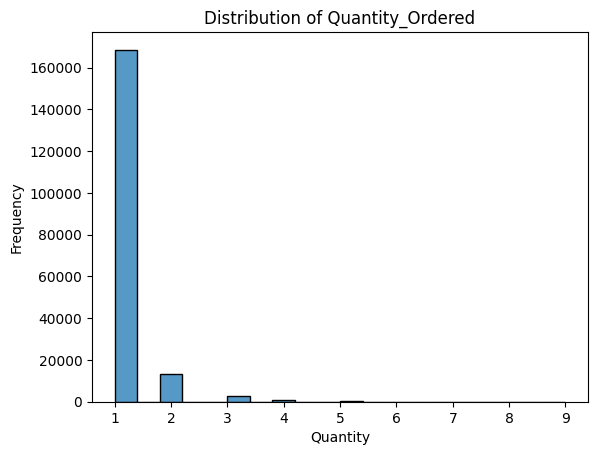

In [61]:
#missing values in Quantity_Ordered
sns.histplot(Data['Quantity_Ordered'],bins=20)
plt.title("Distribution of Quantity_Ordered")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

Since the distribution is skewed to the right, we cannot use the mmean or median, we shall use the mode

In [63]:
Data["Quantity_Ordered"]=Data["Quantity_Ordered"].fillna(Data["Quantity_Ordered"].mode()[0])

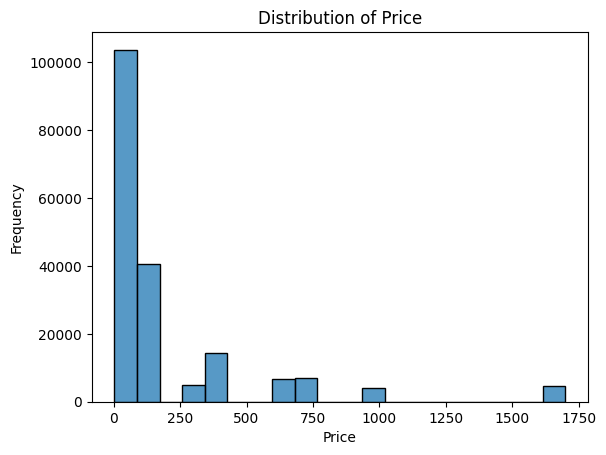

In [62]:
#missing values in Price_Each
sns.histplot(Data['Price_Each'],bins=20)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [64]:
Data["Price_Each"] = Data["Price_Each"].fillna(Data["Price_Each"].mode()[0])

In [73]:
#missing values Order_Date
Data["Order_Date"] = Data["Order_Date"].fillna(method="ffill")

C:\Users\user\AppData\Local\Temp\ipykernel_5704\1517982450.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data["Order_Date"] = Data["Order_Date"].fillna(method="ffill")


In [66]:
#missing values Purchase_Address
Data["Purchase_Address"] = Data["Purchase_Address"].fillna(Data["Purchase_Address"].mode()[0])

In [67]:
Data.isnull().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

In [68]:
Data.to_csv('capstonedata.csv', index=False)

In [70]:
#Change the Order_Date column format 
# Ensure Order_Date is in datetime format
Data['Order_Date'] = pd.to_datetime(Data['Order_Date'], errors='coerce')  # 'errors=coerce' handles any invalid parsing

# Change the date format to 'dd-mm-yyyy HH:MM:SS'
Data['Order_Date'] = Data['Order_Date'].dt.strftime('%d-%m-%Y %H:%M:%S')

# Display the first few rows to check the changes
print(Data.head())

C:\Users\user\AppData\Local\Temp\ipykernel_5704\257769531.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Data['Order_Date'] = pd.to_datetime(Data['Order_Date'], errors='coerce')  # 'errors=coerce' handles any invalid parsing


   Order_ID                   Product  Quantity_Ordered  Price_Each  \
0  141234.0                    iPhone               1.0      700.00   
1  141235.0  Lightning Charging Cable               1.0       14.95   
2  141236.0          Wired Headphones               2.0       11.99   
3  141237.0          27in FHD Monitor               1.0      149.99   
4  141238.0          Wired Headphones               1.0       11.99   

            Order_Date                       Purchase_Address  
0  22-01-2019 21:25:00        944 Walnut St, Boston, MA 02215  
1  28-01-2019 14:15:00       185 Maple St, Portland, OR 97035  
2  17-01-2019 13:33:00  538 Adams St, San Francisco, CA 94016  
3  05-01-2019 20:33:00     738 10th St, Los Angeles, CA 90001  
4  25-01-2019 11:59:00          387 10th St, Austin, TX 73301  


In [74]:
Data.isnull().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

In [75]:
Data.to_csv('capstonedata_2.csv', index=False)